# A1C to Glucose Conversion

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sympy as sp


### Conversion table

In [2]:
# Defining data for the dataframe
a1c_glucose = {
    'A1C': [4.0, 4.1,  4.2, 4.3,  4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.3, 8.5, 9.0, 9.5, 10, 11, 12, 13, 14, 15],
    'Glucose': [65, 69 , 72, 76, 79, 83, 86, 90, 93, 97, 101, 104, 108, 111, 115, 118, 122, 126, 129, 133, 136, 140, 143, 147, 151, 154, 158, 161, 165, 168, 172, 176, 180, 183, 186, 190, 193, 197, 200, 204, 207, 211, 218, 225, 243, 261, 279, 314,350, 386,421,457]

}

# Creating the dataframe
df = pd.DataFrame(a1c_glucose)

print(df)

     A1C  Glucose
0    4.0       65
1    4.1       69
2    4.2       72
3    4.3       76
4    4.4       79
5    4.5       83
6    4.6       86
7    4.7       90
8    4.8       93
9    4.9       97
10   5.0      101
11   5.1      104
12   5.2      108
13   5.3      111
14   5.4      115
15   5.5      118
16   5.6      122
17   5.7      126
18   5.8      129
19   5.9      133
20   6.0      136
21   6.1      140
22   6.2      143
23   6.3      147
24   6.4      151
25   6.5      154
26   6.6      158
27   6.7      161
28   6.8      165
29   6.9      168
30   7.0      172
31   7.1      176
32   7.2      180
33   7.3      183
34   7.4      186
35   7.5      190
36   7.6      193
37   7.7      197
38   7.8      200
39   7.9      204
40   8.0      207
41   8.1      211
42   8.3      218
43   8.5      225
44   9.0      243
45   9.5      261
46  10.0      279
47  11.0      314
48  12.0      350
49  13.0      386
50  14.0      421
51  15.0      457


### Visualization

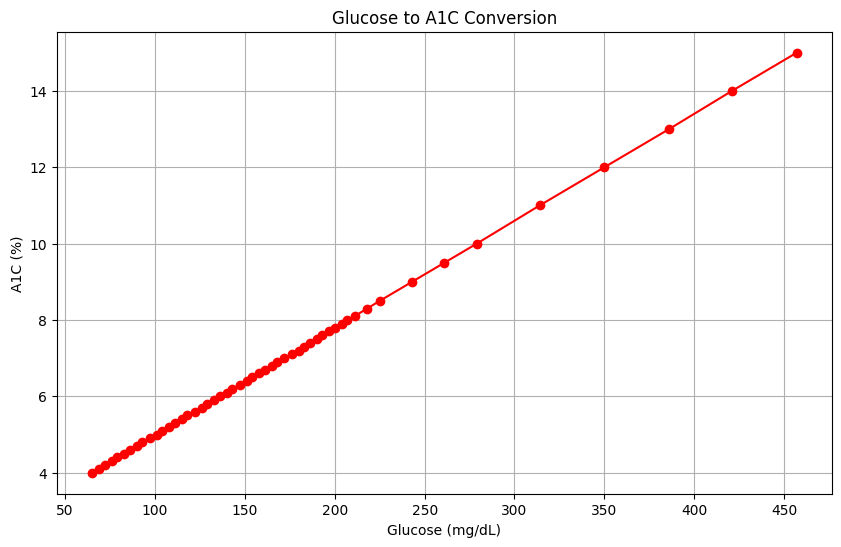

In [3]:
# Plotting Glucose vs. A1C
plt.figure(figsize=(10, 6))
plt.plot(df['Glucose'], df['A1C'], marker='o', linestyle='-', color='r')
plt.title('Glucose to A1C Conversion')
plt.xlabel('Glucose (mg/dL)')
plt.ylabel('A1C (%)')
plt.grid(True)
plt.show()

### Function Fitting

In [4]:
# Define the model function to be fitted to the data
def model_func(x, a, b, c):
    return a * x ** 2 + b * x  + c

### Curve fitting

In [5]:
# Convert columna to NumPy array
a1c = np.array(df['A1C'])
glucose = np.array(df['Glucose'])

In [6]:
# Use curve_fit to find the optimal parameters
glucose_a1c_params, params_covariance = curve_fit(model_func, glucose, a1c,  maxfev=500000000)
standard_errors = np.sqrt(np.diag(params_covariance))
print("Fitted Parameters:")
print(glucose_a1c_params)
print("\nStandard Errors of Parameters:")
print(standard_errors)
print("\nCovariance Matrix:")
print(params_covariance)

Fitted Parameters:
[7.04381209e-09 2.80681669e-02 2.17484707e+00]

Standard Errors of Parameters:
[1.19781126e-07 5.80394403e-05 5.91268150e-03]

Covariance Matrix:
[[ 1.43475180e-14 -6.73303620e-12  6.24395217e-10]
 [-6.73303620e-12  3.36857663e-09 -3.28981468e-07]
 [ 6.24395217e-10 -3.28981468e-07  3.49598025e-05]]


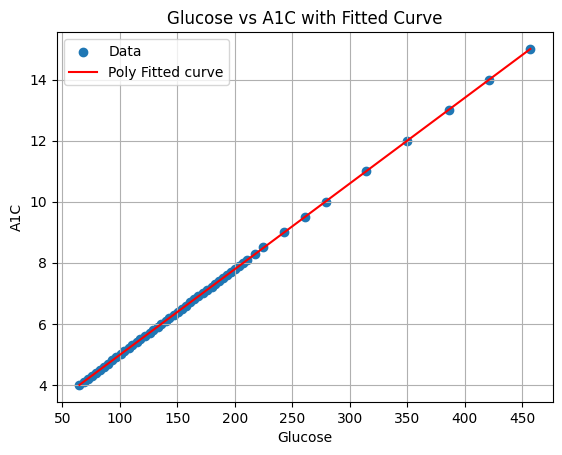

In [7]:
# Plot the data and the fitted curve
plt.scatter(glucose, a1c, label='Data')
plt.plot(glucose, model_func(glucose, *glucose_a1c_params), label='Poly Fitted curve', color='red')
plt.legend()
plt.xlabel('Glucose')
plt.ylabel('A1C')
plt.title('Glucose vs A1C with Fitted Curve')
plt.grid(True)
plt.show()

Root Mean Squared Error (RMSE): 0.008839140464569354 %
Error's Standard Deviation: 0.004959109517627502 %
Error's Uncertainty Percent: 56.10397908603788 %


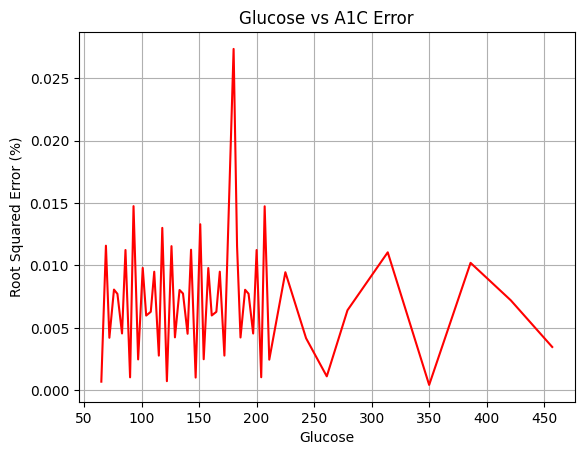

In [8]:
error = np.sqrt((a1c - model_func(glucose, *glucose_a1c_params))**2)
RMSE = np.sqrt(np.mean(error**2))
print(f"Root Mean Squared Error (RMSE): {RMSE} %")
print(f"Error's Standard Deviation: {np.std(error)} %")
print(f"Error's Uncertainty Percent: {(np.std(error)/RMSE)*100} %")
plt.plot(glucose, error, label='Error', color='red')
plt.xlabel('Glucose')
plt.ylabel('Root Squared Error (%)')
plt.title('Glucose vs A1C Error')
plt.grid(True)

## Symbolic Polinomial calculation

In [9]:
# Define the variables
glucose = sp.symbols('glucose')

# Define the coefficients for the polynomial fitting for target PWM
a, b, c = glucose_a1c_params;

# Define the 2rd degree polynomial
a1c = a*glucose**2 + b*glucose + c

# Display the original polynomial
print(f"Ac1:\n {a1c}")


Ac1:
 7.04381208915805e-9*glucose**2 + 0.0280681669271251*glucose + 2.17484707166987


## Polynomial Order Reduction
Remove terms with degrees 2 because on the expected operational range they are not significant compared to the 1fr degree terms.

In [10]:
# Convert to polynomial
poly = sp.Poly(a1c, glucose)

# Remove terms with degrees 4 and 3
coeffs = poly.all_coeffs()
filtered_coeffs = [coeff if i < 2 else 0 for i, coeff in enumerate(reversed(coeffs))]
# Round filtered_coeffs to 4 decimals
round_coeffs = [round(coeff, 4) for coeff in reversed(filtered_coeffs)]
filtered_poly = sp.Poly.from_list(round_coeffs, glucose).as_expr()
print(f"Filtered Coefficients:\n {round_coeffs}")
print(f"======================================\nOrder Reduced Glucose to A1C:\n {filtered_poly}\n======================================")

Filtered Coefficients:
 [0, 0.0281, 2.1748]
Order Reduced Glucose to A1C:
 0.028099*glucose + 2.1748
